# <center> **A Study OF Various Optimizers on Flower Image Classification Task using CNN**


- **Sourav Bhattacharjee**
- **Ramakrishna Mission Vivekanada Educational And Research Institute**
- **M.Sc. Big Data Analytics**


# Importing Necessary Libraries

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
import torch.nn as nn
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import glob
import torch.optim as optim
import seaborn as sns

In [ ]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


# Load the data

In [ ]:
!wget https://s3.amazonaws.com/video.udacity-data.com/topher/2018/September/5baa60a0_flower-photos/flower-photos.zip

--2021-10-03 10:10:14--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/September/5baa60a0_flower-photos/flower-photos.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.36.22
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.36.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229734282 (219M) [application/zip]
Saving to: ‘flower-photos.zip’

flower-photos.zip   100%[===================>] 219.09M  65.0MB/s    in 3.6s    

2021-10-03 10:10:18 (60.8 MB/s) - ‘flower-photos.zip’ saved [229734282/229734282]



In [ ]:
!unzip flower-photos.zip

Archive:  flower-photos.zip
   creating: flower_photos/
  inflating: flower_photos/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/flower_photos/
  inflating: __MACOSX/flower_photos/._.DS_Store  
  inflating: flower_photos/LICENSE.txt  
   creating: flower_photos/test/
  inflating: flower_photos/test/.DS_Store  
   creating: __MACOSX/flower_photos/test/
  inflating: __MACOSX/flower_photos/test/._.DS_Store  
   creating: flower_photos/test/daisy/
  inflating: flower_photos/test/daisy/14332947164_9b13513c71_m.jpg  
  inflating: flower_photos/test/daisy/14333681205_a07c9f1752_m.jpg  
  inflating: flower_photos/test/daisy/14350958832_29bdd3a254.jpg  
  inflating: flower_photos/test/daisy/14354051035_1037b30421_n.jpg  
  inflating: flower_photos/test/daisy/14372713423_61e2daae88.jpg  
  inflating: flower_photos/test/daisy/14399435971_ea5868c792.jpg  
  inflating: flower_photos/test/daisy/14402451388_56545a374a_n.jpg  
  inflating: flower_photos/test/daisy/14421389519_d5fd353eb4.jpg

# Data transformations and augmentations for better training

In [ ]:
transform=transforms.Compose([transforms.RandomRotation(25),
                              transforms.Resize((150,150)),
                               transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                  transforms.Normalize([0.5,0.5,0.5],
                                                       [0.5,0.5,0.5])])

# Dataloader

In [ ]:
#dataloader from pytorch
train_path = '/content/flower_photos/train/'
test_path = '/content/flower_photos/test/'
batch_size = 20
train_loader = DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=transform),
    batch_size=20,shuffle=True
)
test_loader = DataLoader(
    torchvision.datasets.ImageFolder(test_path,transform=transform),
    batch_size=20,shuffle=True
)

In [ ]:
def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

In [ ]:
list(listdir_nohidden(train_path))


['dandelion', 'daisy', 'roses', 'tulips', 'sunflowers']

In [ ]:
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Visualize a batch of training data

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

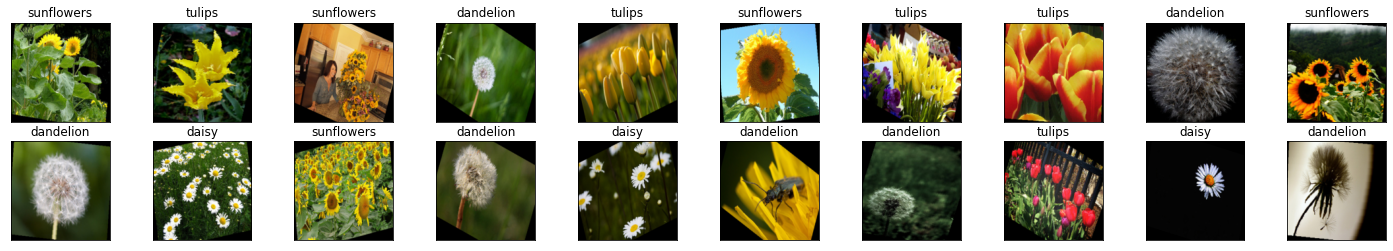

In [ ]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

# More about the training data...



In [ ]:
daisy_n=len(glob.glob(train_path+'/daisy/*.jpg'))
dandelion_n=len(glob.glob(train_path+'/dandelion/*.jpg'))
roses_n=len(glob.glob(train_path+'/roses/*.jpg'))
sunflowers_n=len(glob.glob(train_path+'/sunflowers/*.jpg'))
tulips_n=len(glob.glob(train_path+'/tulips/*.jpg'))
print(daisy_n,dandelion_n,roses_n,sunflowers_n,tulips_n)

541 766 550 598 675


Text(0.5, 1.0, 'Distribution of training set data')

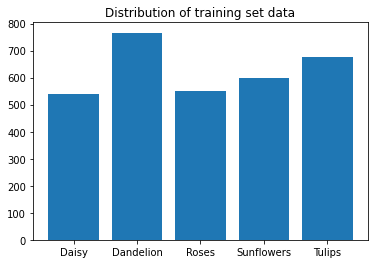

In [ ]:
plt.bar(np.arange(0,5),[daisy_n,dandelion_n,roses_n,sunflowers_n,tulips_n], tick_label = ["Daisy",'Dandelion','Roses','Sunflowers','Tulips'])
plt.title("Distribution of training set data")

Clearly there is not much class imbalances. 

# Test data class distribution

In [ ]:
daisy_nt=len(glob.glob(test_path+'/daisy/*.jpg'))
dandelion_nt=len(glob.glob(test_path+'/dandelion/*.jpg'))
roses_nt=len(glob.glob(test_path+'/roses/*.jpg'))
sunflowers_nt=len(glob.glob(test_path+'/sunflowers/*.jpg'))
tulips_nt=len(glob.glob(test_path+'/tulips/*.jpg'))
print(daisy_nt,dandelion_nt,roses_nt,sunflowers_nt,tulips_nt)

92 132 91 101 124


Text(0.5, 1.0, 'Distribution of test set data')

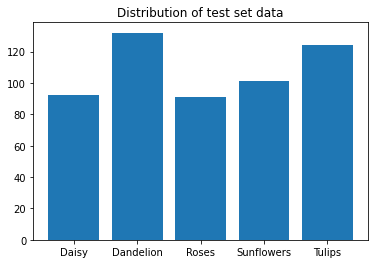

In [ ]:
plt.bar(np.arange(0,5),[daisy_nt,dandelion_nt,roses_nt,sunflowers_nt,tulips_nt], tick_label = ["Daisy",'Dandelion','Roses','Sunflowers','Tulips'])
plt.title('Distribution of test set data')

# The Network architecture

Here we use a simple CNN architecture with 3 convolution layers, each followed by a batch nomralisation and non-linear activation function ReLU. Finally, there is one fully connected layer with 5 outputs for 5 different classes. Input is 150X150 RGB flower images and final output is 5.

In [ ]:
class ConvNet(nn.Module):
    def __init__(self,num_classes=5):
        super(ConvNet,self).__init__()
        # Imge shape=(256,3,150,150)
        #Output size after convolution
        #((w-f-2p)/s)+1
        self.conv1=nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)
        #shape(32,12,150,150)
        self.bn1=nn.BatchNorm2d(num_features=12)
        #shape(32,12,150,150)
        self.relu1=nn.ReLU()
        #shape(32,12,150,150)
        self.Pool=nn.MaxPool2d(kernel_size=2)
        #reduces the imsge sizes by a factor of 2
        #shape(32,12,75,75)
       
        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
        self.bn2=nn.BatchNorm2d(num_features=20)
        self.relu2=nn.ReLU()
        #shape(32,20,75,75)
       
       
       
        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
        #shape(32,12,150,150)
        self.bn3=nn.BatchNorm2d(num_features=32)
        #shape(32,12,150,150)
        self.relu3=nn.ReLU()
       
        self.fc=nn.Linear(in_features=75*75*32,out_features=num_classes)
       
    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
       
        output=self.Pool(output)
       
        output=self.conv2(output)
        output=self.bn2(output)
        output=self.relu2(output)
       
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
       
        output=output.view(-1,32*75*75)
       
        output=self.fc(output)
        return output



# Architecture summery 

In [ ]:
# create a complete CNN
model = ConvNet()
print(model)

ConvNet(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (Pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (conv3): Conv2d(20, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (fc): Linear(in_features=180000, out_features=5, bias=True)
)


In [ ]:
# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

We will have a look into the foillowing types of Optimizers :-
1. **Stochastic Gradient Descent**
2. **Stochastic Gradient Descent with Momentum**
3. **Adagrad**
4. **RMS Prop**
5. **Adam**

In [ ]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer

optimizer_sgd = optim.SGD(model.parameters(), lr=0.001)
optimizer_sgd1 = optim.SGD(model.parameters(), lr = 0.01)
optimizer_sgd_momentum = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
optimizer_adam = optim.Adam(model.parameters(), lr=0.001)
optimizer_adagrad = optim.Adagrad(model.parameters(), lr = 0.001)
optimizer_rmsprop = optim.RMSprop(model.parameters(), lr=0.01)
optimizer_rmsprop1 = optim.RMSprop(model.parameters(), lr=0.001)


In [ ]:
train_count=len(glob.glob(train_path+'/**/*.jpg'))
test_count=len(glob.glob(test_path+'/**/*.jpg'))
print(train_count,test_count)

3130 540


# SGD with learning rate = 0.001

<br>
<br>

Originally we are using Mini-Batch gradient descent here. Mini-Batch gradient decent integrates the advantages of batch gradient decent and stochastic gradient decent, and update the parameters after obtaining the gradient of a mini-batch of samples:
$$x_{k+1} = x_{k} − t_{k}∆f(x_{k})^{(i:i+m)}$$
where the mini-batch size is m.<br>
<b>Mini-batch gradient</b> decent can not guarantee good convergence, and the tuning of step size also need some experience.For convenience, people also call mini-batch gradient decent as SGD.

In [ ]:
# number of epochs to train the model
n_epochs = 15

valid_loss_min = np.Inf # track change in validation loss

train_loss_list = []
valid_loss_list = []

conv1_grad1 = []
conv2_grad1 = []
conv3_grad1 = []
for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer_sgd.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer_sgd.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in test_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(test_loader.sampler)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    conv1_grad1.append(torch.linalg.norm(model.conv1.weight.grad))
    conv2_grad1.append(torch.linalg.norm(model.conv2.weight.grad))
    conv3_grad1.append(torch.linalg.norm(model.conv3.weight.grad))
    print("conv1 grads",torch.linalg.norm(model.conv1.weight.grad)) 
    print("conv2 grads",torch.linalg.norm(model.conv2.weight.grad))
    print("conv3 grads",torch.linalg.norm(model.conv3.weight.grad))

    train_loss_list.append(train_loss)
    valid_loss_list.append(valid_loss)
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 3.414857 	Validation Loss: 4.193238
conv1 grads tensor(15.6163, device='cuda:0')
conv2 grads tensor(15.1252, device='cuda:0')
conv3 grads tensor(14.3645, device='cuda:0')
Validation loss decreased (inf --> 4.193238).  Saving model ...
Epoch: 2 	Training Loss: 2.305703 	Validation Loss: 2.037562
conv1 grads tensor(12.5974, device='cuda:0')
conv2 grads tensor(13.9520, device='cuda:0')
conv3 grads tensor(13.7269, device='cuda:0')
Validation loss decreased (4.193238 --> 2.037562).  Saving model ...
Epoch: 3 	Training Loss: 1.835568 	Validation Loss: 1.528452
conv1 grads tensor(4.2876, device='cuda:0')
conv2 grads tensor(9.2997, device='cuda:0')
conv3 grads tensor(8.0137, device='cuda:0')
Validation loss decreased (2.037562 --> 1.528452).  Saving model ...
Epoch: 4 	Training Loss: 1.578021 	Validation Loss: 2.057326
conv1 grads tensor(7.1565, device='cuda:0')
conv2 grads tensor(11.0118, device='cuda:0')
conv3 grads tensor(9.8493, device='cuda:0')
Epoch: 5 	Training 

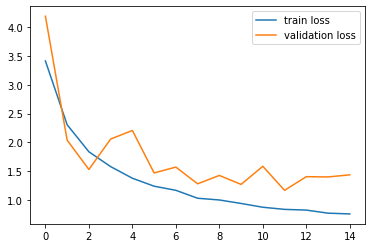

In [ ]:

plt.plot(train_loss_list, label = "train loss")
plt.plot(valid_loss_list, label = "validation loss") 
plt.ylim = (0,2)
plt.legend()                                                                

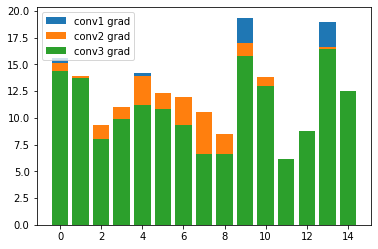

In [ ]:
plt.bar(np.arange(0,15),conv1_grad1, label = "conv1 grad")
plt.bar(np.arange(0,15),conv2_grad1, label = "conv2 grad")
plt.bar(np.arange(0,15),conv3_grad1, label = "conv3 grad")
plt.legend()

In [ ]:
l1=[]
for i in conv1_grad1:
    l1.append(i.item())

l2=[]
for i in conv2_grad1:
    l2.append(i.item())

l3=[]
for i in conv3_grad1:
  l3.append(i.item())

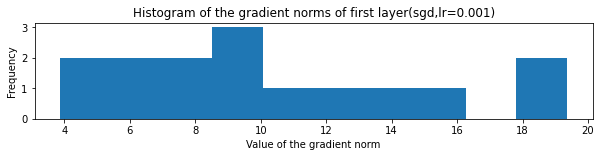

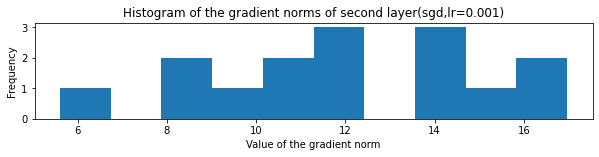

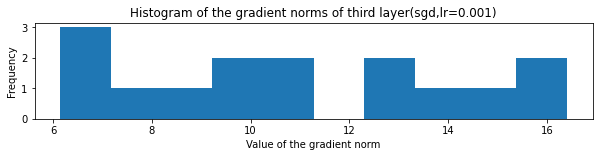

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.hist(l1)
plt.title("Histogram of the gradient norms of first layer(sgd,lr=0.001)")
plt.xlabel("Value of the gradient norm")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(3,1,2)
plt.hist(l2)
plt.title("Histogram of the gradient norms of second layer(sgd,lr=0.001)")
plt.xlabel("Value of the gradient norm")
plt.ylabel("Frequency")

plt.figure(figsize=(10,6))
plt.subplot(3,1,3)
plt.hist(l3)
plt.title("Histogram of the gradient norms of third layer(sgd,lr=0.001)")
plt.xlabel("Value of the gradient norm")
plt.ylabel("Frequency")

plt.show()

Text(0.5, 1.0, 'Distribution of the gradient norms of third layer(SGD,lr=0.001)')

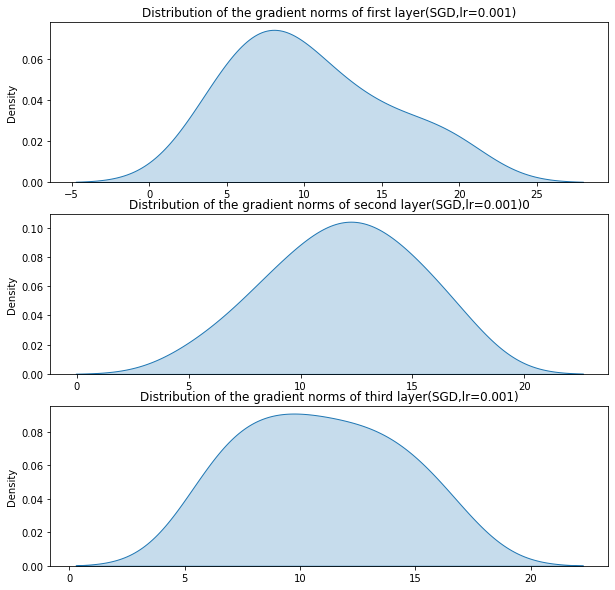

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.kdeplot(l1, fill=True)
plt.title("Distribution of the gradient norms of first layer(SGD,lr=0.001)")
plt.subplot(3,1,2)
sns.kdeplot(l2, fill=True)
plt.title("Distribution of the gradient norms of second layer(SGD,lr=0.001)0")
plt.subplot(3,1,3)
sns.kdeplot(l3, fill=True)
plt.title("Distribution of the gradient norms of third layer(SGD,lr=0.001)")

In [ ]:
# track test loss 
# over 5 flower classes
test_loss = 0.0
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))

model.eval() # eval mode

# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update  test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(5):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 1.442936

Test Accuracy of daisy: 68% (63/92)
Test Accuracy of dandelion: 68% (91/132)
Test Accuracy of roses: 76% (70/91)
Test Accuracy of sunflowers: 54% (55/101)
Test Accuracy of tulips: 16% (20/124)

Test Accuracy (Overall): 55% (299/540)


# SGD with learning rate = 0.01

In [ ]:
# number of epochs to train the model
n_epochs = 15

valid_loss_min = np.Inf # track change in validation loss

train_loss_list0 = []
valid_loss_list0 = []

conv1_grad100 = []
conv2_grad100 = []
conv3_grad100 = []
for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer_sgd1.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer_sgd1.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in test_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(test_loader.sampler)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    conv1_grad100.append(torch.linalg.norm(model.conv1.weight.grad))
    conv2_grad100.append(torch.linalg.norm(model.conv2.weight.grad))
    conv3_grad100.append(torch.linalg.norm(model.conv3.weight.grad))
    print("conv1 grads",torch.linalg.norm(model.conv1.weight.grad)) 
    print("conv2 grads",torch.linalg.norm(model.conv2.weight.grad))
    print("conv3 grads",torch.linalg.norm(model.conv3.weight.grad))

    train_loss_list0.append(train_loss)
    valid_loss_list0.append(valid_loss)
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 4.659273 	Validation Loss: 1.307073
conv1 grads tensor(1.7701, device='cuda:0')
conv2 grads tensor(2.0099, device='cuda:0')
conv3 grads tensor(2.5289, device='cuda:0')
Validation loss decreased (inf --> 1.307073).  Saving model ...
Epoch: 2 	Training Loss: 1.211558 	Validation Loss: 1.218958
conv1 grads tensor(0.6242, device='cuda:0')
conv2 grads tensor(2.4072, device='cuda:0')
conv3 grads tensor(2.5923, device='cuda:0')
Validation loss decreased (1.307073 --> 1.218958).  Saving model ...
Epoch: 3 	Training Loss: 1.118489 	Validation Loss: 1.058638
conv1 grads tensor(1.3873, device='cuda:0')
conv2 grads tensor(1.7080, device='cuda:0')
conv3 grads tensor(3.8721, device='cuda:0')
Validation loss decreased (1.218958 --> 1.058638).  Saving model ...
Epoch: 4 	Training Loss: 1.077833 	Validation Loss: 0.983530
conv1 grads tensor(2.2820, device='cuda:0')
conv2 grads tensor(2.2334, device='cuda:0')
conv3 grads tensor(5.6489, device='cuda:0')
Validation loss decreased 

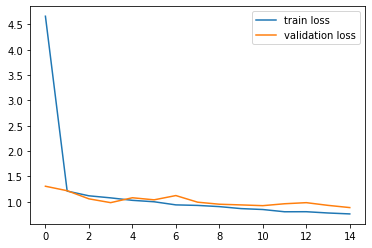

In [ ]:
plt.plot(train_loss_list0, label = "train loss")
plt.plot(valid_loss_list0, label = "validation loss") 
plt.ylim =((0,2))
plt.legend()       

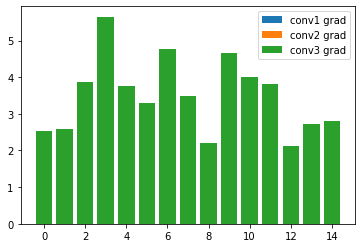

In [ ]:
plt.bar(np.arange(0,15),conv1_grad100, label = "conv1 grad")
plt.bar(np.arange(0,15),conv2_grad100, label = "conv2 grad")
plt.bar(np.arange(0,15),conv3_grad100, label = "conv3 grad")
plt.legend()

In [ ]:
l12=[]
for i in conv1_grad100:
    l12.append(i.item())

l22=[]
for i in conv2_grad100:
    l22.append(i.item())

l32=[]
for i in conv3_grad100:
  l32.append(i.item())

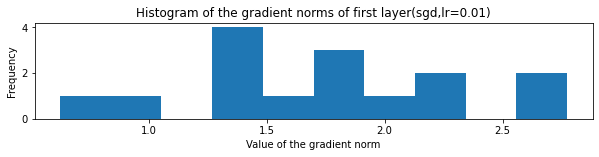

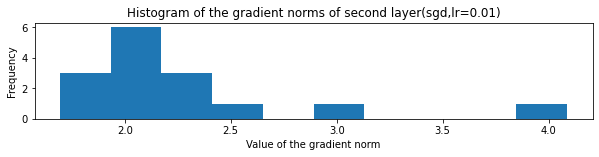

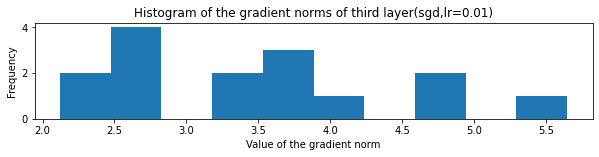

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.hist(l12)
plt.title("Histogram of the gradient norms of first layer(sgd,lr=0.01)")
plt.xlabel("Value of the gradient norm")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(3,1,2)
plt.hist(l22)
plt.title("Histogram of the gradient norms of second layer(sgd,lr=0.01)")
plt.xlabel("Value of the gradient norm")
plt.ylabel("Frequency")

plt.figure(figsize=(10,6))
plt.subplot(3,1,3)
plt.hist(l32)
plt.title("Histogram of the gradient norms of third layer(sgd,lr=0.01)")
plt.xlabel("Value of the gradient norm")
plt.ylabel("Frequency")

plt.show()

Text(0.5, 1.0, 'Distribution of the gradient norms of third layer(SGD,lr=0.01)')

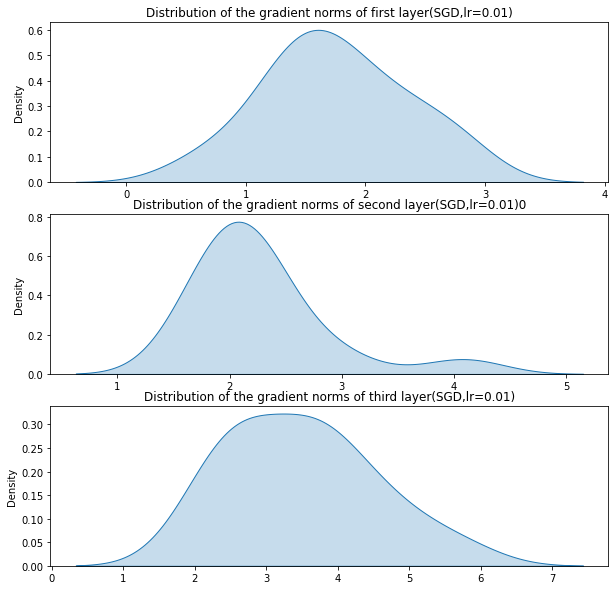

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.kdeplot(l12, fill=True)
plt.title("Distribution of the gradient norms of first layer(SGD,lr=0.01)")
plt.subplot(3,1,2)
sns.kdeplot(l22, fill=True)
plt.title("Distribution of the gradient norms of second layer(SGD,lr=0.01)0")
plt.subplot(3,1,3)
sns.kdeplot(l32, fill=True)
plt.title("Distribution of the gradient norms of third layer(SGD,lr=0.01)")

In [ ]:
# track test loss 
# over 5 flower classes
test_loss = 0.0
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))

model.eval() # eval mode

# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update  test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(5):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.891640

Test Accuracy of daisy: 61% (57/92)
Test Accuracy of dandelion: 80% (106/132)
Test Accuracy of roses: 34% (31/91)
Test Accuracy of sunflowers: 64% (65/101)
Test Accuracy of tulips: 67% (84/124)

Test Accuracy (Overall): 63% (343/540)


# SGD_Momentum=0.9

If there is a long shallow ravine with steep walls on the direction to the optimal point, then the standard SGD will tend to oscillate across the narrow ravine. Momentum is one of the mechanism which is used to fix the direction:
$$v_{k} = mv_{k−1} + t_{k}∆f(x_{k}) ;\;\;\; x_{k+1} = x_{k} − v_{k}$$

where m ∈ (0, 1] determines for how many iterations the previous gradients are incorporated into the current update. Generally m is set to 0.5 until the initial learning stabilizes and then is increased to 0.9 or higher.

In [ ]:
# number of epochs to train the model
n_epochs = 15

valid_loss_min = np.Inf # track change in validation loss

train_loss_list7 = []
valid_loss_list7 = []

conv1_grad10 = []
conv2_grad10 = []
conv3_grad10 = []
for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer_sgd_momentum.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer_sgd_momentum.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in test_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(test_loader.sampler)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    conv1_grad10.append(torch.linalg.norm(model.conv1.weight.grad))
    conv2_grad10.append(torch.linalg.norm(model.conv2.weight.grad))
    conv3_grad10.append(torch.linalg.norm(model.conv3.weight.grad))
    print("conv1 grads",torch.linalg.norm(model.conv1.weight.grad)) 
    print("conv2 grads",torch.linalg.norm(model.conv2.weight.grad))
    print("conv3 grads",torch.linalg.norm(model.conv3.weight.grad))

    train_loss_list7.append(train_loss)
    valid_loss_list7.append(valid_loss)
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 5.590071 	Validation Loss: 1.258080
conv1 grads tensor(1.9395, device='cuda:0')
conv2 grads tensor(2.1961, device='cuda:0')
conv3 grads tensor(4.1167, device='cuda:0')
Validation loss decreased (inf --> 1.258080).  Saving model ...
Epoch: 2 	Training Loss: 1.164854 	Validation Loss: 1.098189
conv1 grads tensor(0.9940, device='cuda:0')
conv2 grads tensor(2.1757, device='cuda:0')
conv3 grads tensor(3.6360, device='cuda:0')
Validation loss decreased (1.258080 --> 1.098189).  Saving model ...
Epoch: 3 	Training Loss: 1.106734 	Validation Loss: 1.082449
conv1 grads tensor(1.2427, device='cuda:0')
conv2 grads tensor(3.5303, device='cuda:0')
conv3 grads tensor(4.5395, device='cuda:0')
Validation loss decreased (1.098189 --> 1.082449).  Saving model ...
Epoch: 4 	Training Loss: 1.059832 	Validation Loss: 1.022195
conv1 grads tensor(1.6924, device='cuda:0')
conv2 grads tensor(2.7942, device='cuda:0')
conv3 grads tensor(4.1037, device='cuda:0')
Validation loss decreased 

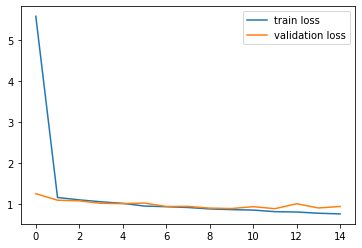

In [ ]:
plt.plot(train_loss_list7, label = "train loss")
plt.plot(valid_loss_list7, label = "validation loss") 
plt.ylim = (0,2)
plt.legend()             

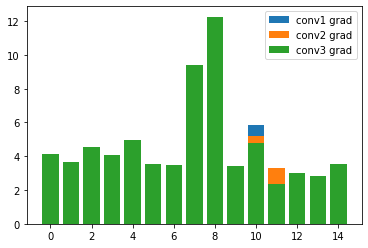

In [ ]:
plt.bar(np.arange(0,15),conv1_grad10, label = "conv1 grad")
plt.bar(np.arange(0,15),conv2_grad10, label = "conv2 grad")
plt.bar(np.arange(0,15),conv3_grad10, label = "conv3 grad")
plt.legend()

In [ ]:
l13=[]
for i in conv1_grad10:
    l13.append(i.item())

l23=[]
for i in conv2_grad10:
    l23.append(i.item())

l33=[]
for i in conv3_grad10:
  l33.append(i.item())

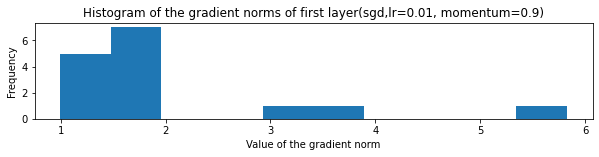

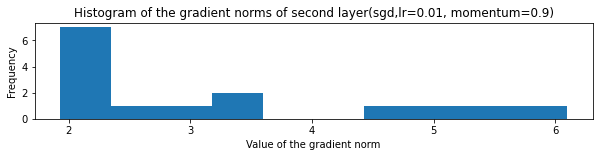

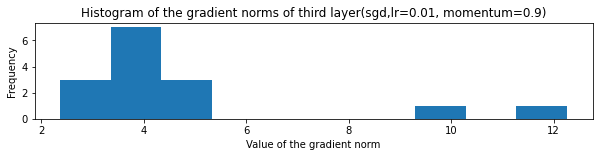

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.hist(l13)
plt.title("Histogram of the gradient norms of first layer(sgd,lr=0.01, momentum=0.9)")
plt.xlabel("Value of the gradient norm")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(3,1,2)
plt.hist(l23)
plt.title("Histogram of the gradient norms of second layer(sgd,lr=0.01, momentum=0.9)")
plt.xlabel("Value of the gradient norm")
plt.ylabel("Frequency")

plt.figure(figsize=(10,6))
plt.subplot(3,1,3)
plt.hist(l33)
plt.title("Histogram of the gradient norms of third layer(sgd,lr=0.01, momentum=0.9)")
plt.xlabel("Value of the gradient norm")
plt.ylabel("Frequency")

plt.show()

Text(0.5, 1.0, 'Distribution of the gradient norms of third layer(SGD,lr=0.001, momentum=0.9)')

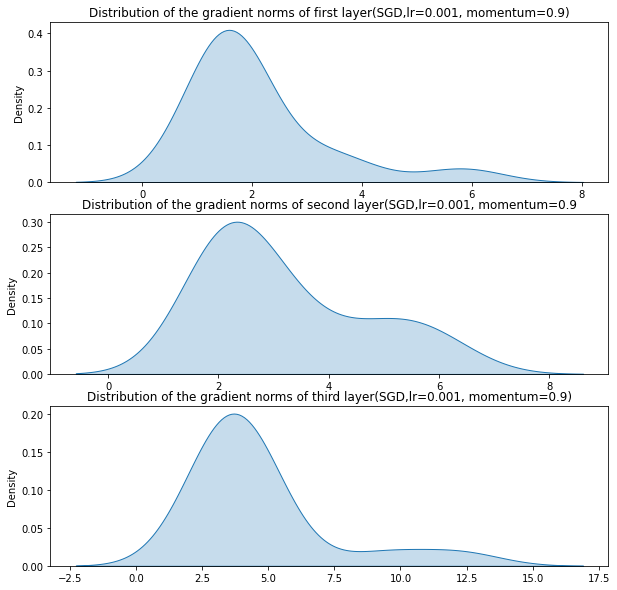

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.kdeplot(l13, fill=True)
plt.title("Distribution of the gradient norms of first layer(SGD,lr=0.001, momentum=0.9)")
plt.subplot(3,1,2)
sns.kdeplot(l23, fill=True)
plt.title("Distribution of the gradient norms of second layer(SGD,lr=0.001, momentum=0.9")
plt.subplot(3,1,3)
sns.kdeplot(l33, fill=True)
plt.title("Distribution of the gradient norms of third layer(SGD,lr=0.001, momentum=0.9)")

In [ ]:
# track test loss 
# over 5 flower classes
test_loss = 0.0
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))

model.eval() # eval mode

# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update  test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(5):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.947159

Test Accuracy of daisy: 75% (69/92)
Test Accuracy of dandelion: 81% (107/132)
Test Accuracy of roses: 45% (41/91)
Test Accuracy of sunflowers: 85% (86/101)
Test Accuracy of tulips: 46% (58/124)

Test Accuracy (Overall): 66% (361/540)


Text(0.5, 1.0, 'SGD with lr = 0.001 vs SGD with lr = 0.01 vs SGD with momentum = 0.9')

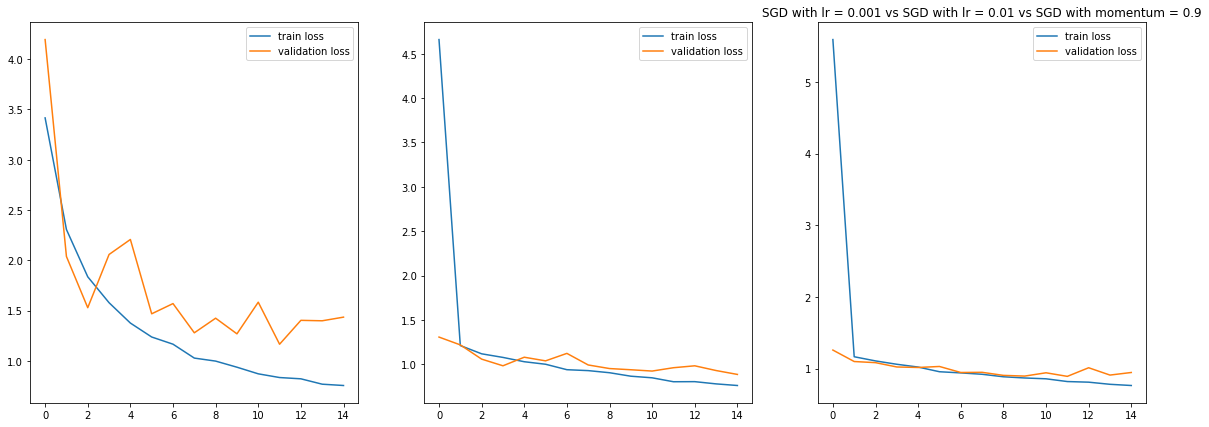

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
plt.plot(train_loss_list, label = "train loss")
plt.plot(valid_loss_list, label = "validation loss") 
plt.ylim = (0,2)       
plt.legend()    

plt.subplot(1,3,2)
plt.plot(train_loss_list0, label = "train loss")
plt.plot(valid_loss_list0, label = "validation loss")    
plt.legend()

plt.subplot(1,3,3)
plt.plot(train_loss_list7, label = "train loss")
plt.plot(valid_loss_list7, label = "validation loss") 
plt.ylim = (0,2)
plt.legend()

plt.title("SGD with lr = 0.001 vs SGD with lr = 0.01 vs SGD with momentum = 0.9", loc='center')

From the above comparison, we can see that SGD with higher learning rate reaches local minima quickly, but still training and validation loss curve is not smooth enough. Whereas SGD with small learning rate and high momentum gives the best performance overall.

# Adagrad with lr=0.001

Adagrad scales the step size for each parameter according to the history of gradients for that parameter which is basically done by dividing current gradient in update rule by the sum of previous gradients:
$$G_{k} = G_{k−1} + ∆f(x_{k})^{2} ;\;\;\; x_{k+1} = x_{k} − \frac{t}{\sqrt{G_{k} + ε}}∆f(x_{k})$$

where G is the accumulation of the history gradients, and ε is a smoothing term that avoids division by
zero (can be 1e − 6). The step size is different for each of the parameters. It is greater for parameters
where the historical gradients were small (since G is small) and the rate is small whenever historical
gradients were relatively big. Therefore, we need not to manually tune the step size t. We can use
a default value of 0.01. But when accumulation G becomes larger, the step size will reach zero at
infinity. So the following methods are proposed.

In [ ]:
# number of epochs to train the model
n_epochs = 15

valid_loss_min = np.Inf # track change in validation loss

train_loss_list70 = []
valid_loss_list70 = []

conv1_grad70 = []
conv2_grad70 = []
conv3_grad70 = []
for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer_adagrad.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer_adagrad.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in test_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(test_loader.sampler)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    conv1_grad70.append(torch.linalg.norm(model.conv1.weight.grad))
    conv2_grad70.append(torch.linalg.norm(model.conv2.weight.grad))
    conv3_grad70.append(torch.linalg.norm(model.conv3.weight.grad))
    print("conv1 grads",torch.linalg.norm(model.conv1.weight.grad)) 
    print("conv2 grads",torch.linalg.norm(model.conv2.weight.grad))
    print("conv3 grads",torch.linalg.norm(model.conv3.weight.grad))

    train_loss_list70.append(train_loss)
    valid_loss_list70.append(valid_loss)
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 4.867968 	Validation Loss: 2.819763
conv1 grads tensor(27.8198, device='cuda:0')
conv2 grads tensor(25.3434, device='cuda:0')
conv3 grads tensor(14.5806, device='cuda:0')
Validation loss decreased (inf --> 2.819763).  Saving model ...
Epoch: 2 	Training Loss: 2.012643 	Validation Loss: 1.782087
conv1 grads tensor(31.6651, device='cuda:0')
conv2 grads tensor(28.5341, device='cuda:0')
conv3 grads tensor(13.6542, device='cuda:0')
Validation loss decreased (2.819763 --> 1.782087).  Saving model ...
Epoch: 3 	Training Loss: 1.402076 	Validation Loss: 1.718606
conv1 grads tensor(21.2156, device='cuda:0')
conv2 grads tensor(48.9504, device='cuda:0')
conv3 grads tensor(16.7808, device='cuda:0')
Validation loss decreased (1.782087 --> 1.718606).  Saving model ...
Epoch: 4 	Training Loss: 1.270808 	Validation Loss: 1.816465
conv1 grads tensor(15.1212, device='cuda:0')
conv2 grads tensor(24.2123, device='cuda:0')
conv3 grads tensor(22.7731, device='cuda:0')
Epoch: 5 	Trai

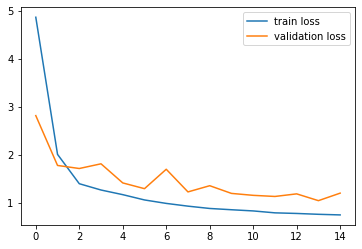

In [ ]:
plt.plot(train_loss_list70, label = "train loss")
plt.plot(valid_loss_list70, label = "validation loss") 
plt.ylim = (0,2)
plt.legend()             

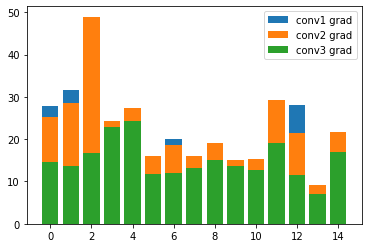

In [ ]:
plt.bar(np.arange(0,15),conv1_grad70, label = "conv1 grad")
plt.bar(np.arange(0,15),conv2_grad70, label = "conv2 grad")
plt.bar(np.arange(0,15),conv3_grad70, label = "conv3 grad")
plt.legend()

In [ ]:
l14=[]
for i in conv1_grad70:
    l14.append(i.item())

l24=[]
for i in conv2_grad70:
    l24.append(i.item())

l34=[]
for i in conv3_grad70:
  l34.append(i.item())

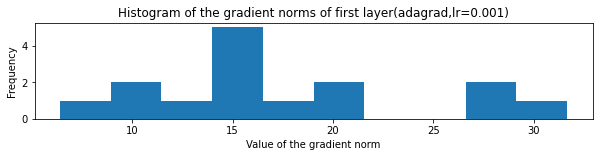

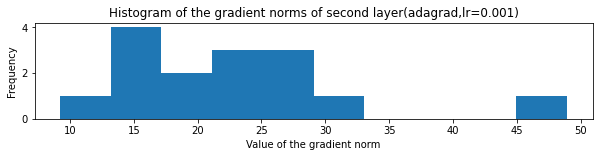

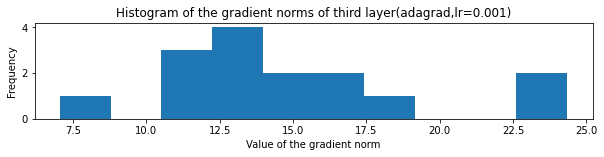

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.hist(l14)
plt.title("Histogram of the gradient norms of first layer(adagrad,lr=0.001)")
plt.xlabel("Value of the gradient norm")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(3,1,2)
plt.hist(l24)
plt.title("Histogram of the gradient norms of second layer(adagrad,lr=0.001)")
plt.xlabel("Value of the gradient norm")
plt.ylabel("Frequency")

plt.figure(figsize=(10,6))
plt.subplot(3,1,3)
plt.hist(l34)
plt.title("Histogram of the gradient norms of third layer(adagrad,lr=0.001)")
plt.xlabel("Value of the gradient norm")
plt.ylabel("Frequency")

plt.show()

Text(0.5, 1.0, 'Distribution of the gradient norms of third layer(Atograd,lr=0.001)')

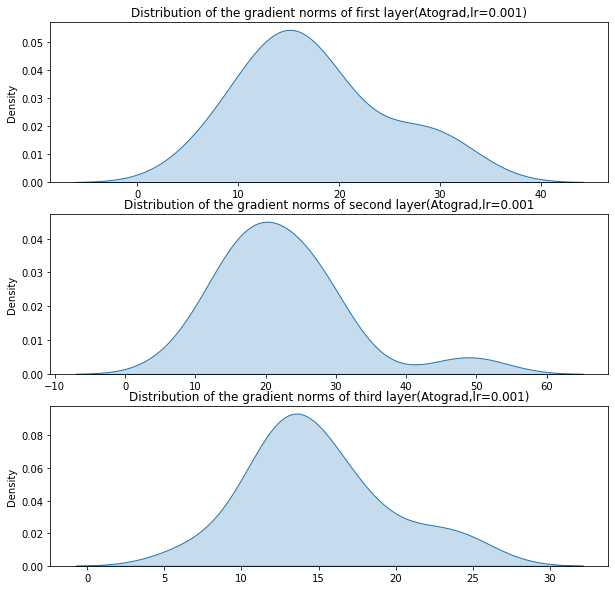

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.kdeplot(l14, fill=True)
plt.title("Distribution of the gradient norms of first layer(Autograd,lr=0.001)")
plt.subplot(3,1,2)
sns.kdeplot(l24, fill=True)
plt.title("Distribution of the gradient norms of second layer(Autograd,lr=0.001")
plt.subplot(3,1,3)
sns.kdeplot(l34, fill=True)
plt.title("Distribution of the gradient norms of third layer(Autograd,lr=0.001)")

In [ ]:
# track test loss 
# over 5 flower classes
test_loss = 0.0
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))

model.eval() # eval mode

# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update  test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(5):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.920766

Test Accuracy of daisy: 69% (64/92)
Test Accuracy of dandelion: 75% (100/132)
Test Accuracy of roses: 51% (47/91)
Test Accuracy of sunflowers: 82% (83/101)
Test Accuracy of tulips: 53% (66/124)

Test Accuracy (Overall): 66% (360/540)


# RMS prop with lr = 0.001

RMSprop is proposed to tackle the problem of step size vanishing of Adagrad. It employs the decaying average of the history gradients:

$$E[∆f(x)^{2}]_{k} = ρE[∆f(x)^{2}]_{k−1} + (1 − ρ)∆f(x_{k})^{2} $$
$$x_{k+1} = x_{k} − \frac{t}{\sqrt{E[∆f(x)2]_{k} + ε}}∆f(x_{k})$$

where ρ is a decay constant (e.g., 0.9).

In [ ]:
# number of epochs to train the model
n_epochs = 15

valid_loss_min = np.Inf # track change in validation loss

train_loss_list20 = []
valid_loss_list20 = []

conv1_grad30 = []
conv2_grad30 = []
conv3_grad30 = []
for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer_rmsprop1.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer_rmsprop1.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in test_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(test_loader.sampler)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    conv1_grad30.append(torch.linalg.norm(model.conv1.weight.grad))
    conv2_grad30.append(torch.linalg.norm(model.conv2.weight.grad))
    conv3_grad30.append(torch.linalg.norm(model.conv3.weight.grad))
    print("conv1 grads",torch.linalg.norm(model.conv1.weight.grad)) 
    print("conv2 grads",torch.linalg.norm(model.conv2.weight.grad))
    print("conv3 grads",torch.linalg.norm(model.conv3.weight.grad))
    
    train_loss_list20.append(train_loss)
    valid_loss_list20.append(valid_loss)
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 1 	Training Loss: 46.521431 	Validation Loss: 20.586542
conv1 grads tensor(44.7245, device='cuda:0')
conv2 grads tensor(55.6044, device='cuda:0')
conv3 grads tensor(66.1126, device='cuda:0')
Validation loss decreased (inf --> 20.586542).  Saving model ...
Epoch: 2 	Training Loss: 16.533000 	Validation Loss: 6.091123
conv1 grads tensor(30.5098, device='cuda:0')
conv2 grads tensor(63.5814, device='cuda:0')
conv3 grads tensor(65.7935, device='cuda:0')
Validation loss decreased (20.586542 --> 6.091123).  Saving model ...
Epoch: 3 	Training Loss: 9.762988 	Validation Loss: 10.364632
conv1 grads tensor(41.6290, device='cuda:0')
conv2 grads tensor(49.6520, device='cuda:0')
conv3 grads tensor(74.2496, device='cuda:0')
Epoch: 4 	Training Loss: 5.126366 	Validation Loss: 2.584901
conv1 grads tensor(14.4662, device='cuda:0')
conv2 grads tensor(16.5134, device='cuda:0')
conv3 grads tensor(36.1527, device='cuda:0')
Validation loss decreased (6.091123 --> 2.584901).  Saving model ...
Epoch: 5

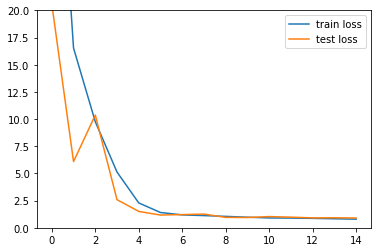

In [ ]:
plt.plot(train_loss_list20, label = 'train loss')
plt.plot(valid_loss_list20, label = 'test loss')
plt.ylim((0,20))
plt.legend()

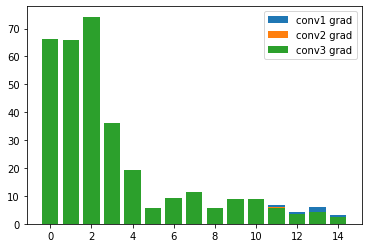

In [ ]:
plt.bar(np.arange(0,15),conv1_grad30, label = "conv1 grad")
plt.bar(np.arange(0,15),conv2_grad30, label = "conv2 grad")
plt.bar(np.arange(0,15),conv3_grad30, label = "conv3 grad")
plt.legend()

In [ ]:
l16=[]
for i in conv1_grad30:
    l16.append(i.item())

l26=[]
for i in conv2_grad30:
    l26.append(i.item())

l36=[]
for i in conv3_grad30:
    l36.append(i.item())

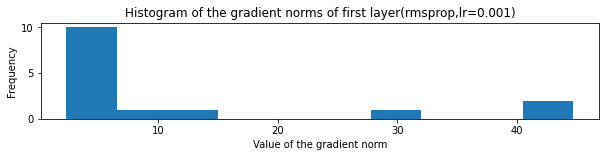

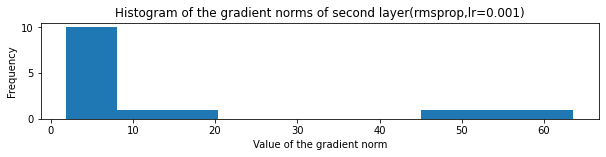

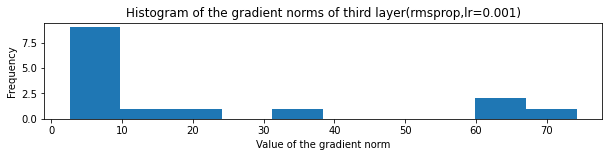

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.hist(l16)
plt.title("Histogram of the gradient norms of first layer(rmsprop,lr=0.001)")
plt.xlabel("Value of the gradient norm")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(3,1,2)
plt.hist(l26)
plt.title("Histogram of the gradient norms of second layer(rmsprop,lr=0.001)")
plt.xlabel("Value of the gradient norm")
plt.ylabel("Frequency")

plt.figure(figsize=(10,6))
plt.subplot(3,1,3)
plt.hist(l36)
plt.title("Histogram of the gradient norms of third layer(rmsprop,lr=0.001)")
plt.xlabel("Value of the gradient norm")
plt.ylabel("Frequency")

plt.show()

Text(0.5, 1.0, 'Distribution of the gradient norms of third layer(rmsprop,lr=0.001)')

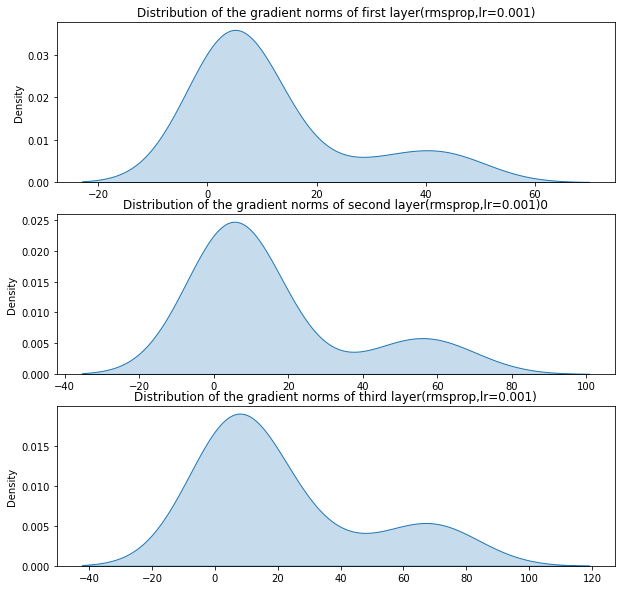

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.kdeplot(l16, fill=True)
plt.title("Distribution of the gradient norms of first layer(rmsprop,lr=0.001)")
plt.subplot(3,1,2)
sns.kdeplot(l26, fill=True)
plt.title("Distribution of the gradient norms of second layer(rmsprop,lr=0.001)0")
plt.subplot(3,1,3)
sns.kdeplot(l36, fill=True)
plt.title("Distribution of the gradient norms of third layer(rmsprop,lr=0.001)")

In [ ]:
# track test loss 
# over 5 flower classes
test_loss = 0.0
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))

model.eval() # eval mode

# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update  test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(5):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 1.177354

Test Accuracy of daisy: 89% (82/92)
Test Accuracy of dandelion: 39% (52/132)
Test Accuracy of roses: 67% (61/91)
Test Accuracy of sunflowers: 78% (79/101)
Test Accuracy of tulips: 29% (37/124)

Test Accuracy (Overall): 57% (311/540)


# ADAM

Adam optimization algorithm is an extension to stochastic gradient descent. It was presented in 2015.The name **Adam** is derived from **Adaptive moment estimation**.The authors describe Adam as combining the advantages of two other extensions of stochastic gradient descent algorithm.

Adam is another method that computes adaptive step size for each parameter. It uses both the decaying average of history gradients and their squared values. Adam update rule consists of the
following steps:

$$m_{k} = β_{1}m_{k−1} + (1 − β_{1})∆f(x_{k})$$
$$v_{k} = β_{2}v_{k−1} + (1 − β_{2})∆f(x_{k})^{2}$$
$$mˆ_{k} = \frac{m_{k}}{1 − β_{k}^{1}} ;\;\; vˆ_{k} = \frac{v_{k}}{1 − β_{k}^{2}}$$
$$x_{k+1} = x_{k} − \frac{t}{\sqrt{vˆ_{k} + ε}}mˆ_{k}$$

where β1 can be 0.9, β2 can be 0.999, and ε can be 1e − 8.

Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second moments of the gradients (the uncentered variance).


In [ ]:
# number of epochs to train the model
n_epochs = 15

valid_loss_min = np.Inf # track change in validation loss

train_loss_list1 = []
valid_loss_list1 = []

conv1_grad2 = []
conv2_grad2 = []
conv3_grad2 = []
for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer_adam.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer_adam.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in test_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(test_loader.sampler)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    conv1_grad2.append(torch.linalg.norm(model.conv1.weight.grad))
    conv2_grad2.append(torch.linalg.norm(model.conv2.weight.grad))
    conv3_grad2.append(torch.linalg.norm(model.conv3.weight.grad))
    print("conv1 grads",torch.linalg.norm(model.conv1.weight.grad)) 
    print("conv2 grads",torch.linalg.norm(model.conv2.weight.grad))
    print("conv3 grads",torch.linalg.norm(model.conv3.weight.grad))
    
    train_loss_list1.append(train_loss)
    valid_loss_list1.append(valid_loss)
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 8.996545 	Validation Loss: 7.774781
conv1 grads tensor(44.4222, device='cuda:0')
conv2 grads tensor(33.3174, device='cuda:0')
conv3 grads tensor(28.2472, device='cuda:0')
Validation loss decreased (inf --> 7.774781).  Saving model ...
Epoch: 2 	Training Loss: 4.697173 	Validation Loss: 3.057073
conv1 grads tensor(49.3859, device='cuda:0')
conv2 grads tensor(27.4576, device='cuda:0')
conv3 grads tensor(26.5147, device='cuda:0')
Validation loss decreased (7.774781 --> 3.057073).  Saving model ...
Epoch: 3 	Training Loss: 2.719594 	Validation Loss: 3.585804
conv1 grads tensor(31.5799, device='cuda:0')
conv2 grads tensor(15.3333, device='cuda:0')
conv3 grads tensor(14.0348, device='cuda:0')
Epoch: 4 	Training Loss: 1.844119 	Validation Loss: 1.350118
conv1 grads tensor(16.0007, device='cuda:0')
conv2 grads tensor(10.6186, device='cuda:0')
conv3 grads tensor(13.3174, device='cuda:0')
Validation loss decreased (3.057073 --> 1.350118).  Saving model ...
Epoch: 5 	Trai

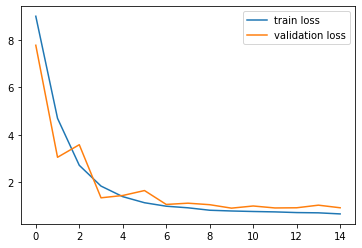

In [ ]:
plt.plot(train_loss_list1, label = "train loss")
plt.plot(valid_loss_list1, label = "validation loss") 
plt.legend()           

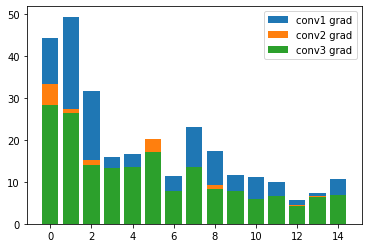

In [ ]:
plt.bar(np.arange(0,15),conv1_grad2, label = "conv1 grad")
plt.bar(np.arange(0,15),conv2_grad2, label = "conv2 grad")
plt.bar(np.arange(0,15),conv3_grad2, label = "conv3 grad")
plt.legend()

In [ ]:
l15=[]
for i in conv1_grad2:
    l15.append(i.item())

l25=[]
for i in conv2_grad2:
    l25.append(i.item())

l35=[]
for i in conv3_grad2:
  l35.append(i.item())

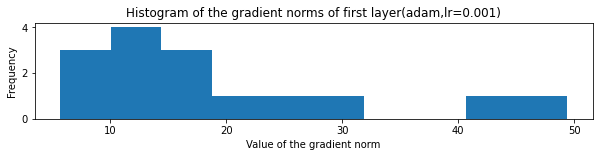

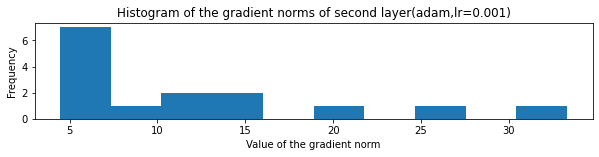

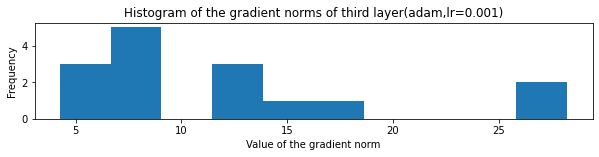

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.hist(l15)
plt.title("Histogram of the gradient norms of first layer(adam,lr=0.001)")
plt.xlabel("Value of the gradient norm")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(3,1,2)
plt.hist(l25)
plt.title("Histogram of the gradient norms of second layer(adam,lr=0.001)")
plt.xlabel("Value of the gradient norm")
plt.ylabel("Frequency")

plt.figure(figsize=(10,6))
plt.subplot(3,1,3)
plt.hist(l35)
plt.title("Histogram of the gradient norms of third layer(adam,lr=0.001)")
plt.xlabel("Value of the gradient norm")
plt.ylabel("Frequency")

plt.show()

In [ ]:
# track test loss 
# over 5 flower classes
test_loss = 0.0
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))

model.eval() # eval mode

# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update  test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(5):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.949127

Test Accuracy of daisy: 68% (63/92)
Test Accuracy of dandelion: 84% (112/132)
Test Accuracy of roses: 41% (38/91)
Test Accuracy of sunflowers: 59% (60/101)
Test Accuracy of tulips: 61% (76/124)

Test Accuracy (Overall): 64% (349/540)


From the above analysis it is quite clear that ADAM is performing the best among all the above mentioned optimizers. The norm of the gradients at each convolution layer is decreasing gradually as expected, training loss has also decreased the lowest. Validation loss also decreasing nicely with the training loss. Hence we can conclude that for the Flower Classification task using CNN, ADAM seems to perform the best.